In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

corpus = [
     "she loves you yeah yeah yeah",
     "all you need is love",
     "money cant buy me love",
     "help i need somebody",
     "can you feel the love tonight",
     "and it seems to me you lived your life like a candle in the wind",
     "crocodile rock",
     "bennie and the jets"
]


In [2]:
labels = list("BBBBEEEE")
labels

['B', 'B', 'B', 'B', 'E', 'E', 'E', 'E']

In [3]:
#
# Step 1: tokenize + count bag of words
#

In [4]:
cv = CountVectorizer()

In [5]:
vec = cv.fit_transform(corpus)

In [6]:
cv.vocabulary_

{'she': 24,
 'loves': 18,
 'you': 31,
 'yeah': 30,
 'all': 0,
 'need': 21,
 'is': 11,
 'love': 17,
 'money': 20,
 'cant': 6,
 'buy': 3,
 'me': 19,
 'help': 9,
 'somebody': 25,
 'can': 4,
 'feel': 8,
 'the': 26,
 'tonight': 28,
 'and': 1,
 'it': 12,
 'seems': 23,
 'to': 27,
 'lived': 16,
 'your': 32,
 'life': 14,
 'like': 15,
 'candle': 5,
 'in': 10,
 'wind': 29,
 'crocodile': 7,
 'rock': 22,
 'bennie': 2,
 'jets': 13}

In [7]:
vec.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [8]:
#
# Step 2: apply Tf-Idf
#

In [9]:
tf = TfidfTransformer()

In [10]:
vec2 = tf.fit_transform(vec)

In [11]:
vec2.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.29614771, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.29614771,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.88844312, 0.18778149, 0.        ],
        [0.52504902, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.52504902, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.37971156, 0.        , 0.        ,
         0.        , 0.44003206, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.33292335, 0.        ],
        [0.        , 0.        , 0.        , 0.48648224, 0.        ,
         0.

In [12]:
#
# Step 3: build Naive Bayes model
#

In [13]:
X = vec2
y = labels

In [14]:
m = MultinomialNB()

In [15]:
m.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
m.score(X, y)

1.0

In [17]:
#
# test with text samples
#

In [18]:
test_songs = [
      "hello you yeah crocodile",
      "love you money yeah yeah yeah",
      "bennie and the candle",
      "with a little help from my crocodile"]


In [19]:
# we need to vectorize + tfidf first

test_vec = cv.transform(test_songs)

In [20]:
test_vec2 = tf.transform(test_vec)

In [21]:
# prediction results
print(m.predict(test_vec2))


['B' 'B' 'E' 'B']


In [22]:
# class probabilities
print(m.predict_proba(test_vec2))


[[0.53625999 0.46374001]
 [0.69504254 0.30495746]
 [0.30505216 0.69494784]
 [0.50389791 0.49610209]]


In [23]:
m.feature_log_prob_

array([[-3.28706481, -3.70909137, -3.70909137, -3.31267895, -3.70909137,
        -3.70909137, -3.31267895, -3.70909137, -3.70909137, -3.23390547,
        -3.70909137, -3.28706481, -3.70909137, -3.70909137, -3.70909137,
        -3.70909137, -3.70909137, -3.16008485, -3.44969481, -3.36712704,
        -3.31267895, -3.041341  , -3.70909137, -3.70909137, -3.44969481,
        -3.23390547, -3.70909137, -3.70909137, -3.70909137, -3.70909137,
        -3.07333863, -3.28991743, -3.70909137],
       [-3.74992359, -3.2161665 , -3.30728278, -3.74992359, -3.36184331,
        -3.49932985, -3.74992359, -3.2151236 , -3.36184331, -3.74992359,
        -3.49932985, -3.74992359, -3.49932985, -3.30728278, -3.49932985,
        -3.49932985, -3.49932985, -3.45509183, -3.74992359, -3.53588167,
        -3.74992359, -3.74992359, -3.2151236 , -3.49932985, -3.74992359,
        -3.74992359, -3.08130476, -3.49932985, -3.36184331, -3.49932985,
        -3.74992359, -3.35705305, -3.49932985]])

In [24]:
probdiff = m.feature_log_prob_[0] - m.feature_log_prob_[1]

In [25]:
probdiff

array([ 0.46285878, -0.49292488, -0.40180859,  0.43724464, -0.34724806,
       -0.20976152,  0.43724464, -0.49396777, -0.34724806,  0.51601812,
       -0.20976152,  0.46285878, -0.20976152, -0.40180859, -0.20976152,
       -0.20976152, -0.20976152,  0.29500698,  0.30022879,  0.16875463,
        0.43724464,  0.7085826 , -0.49396777, -0.20976152,  0.30022879,
        0.51601812, -0.62778661, -0.20976152, -0.34724806, -0.20976152,
        0.67658497,  0.06713562, -0.20976152])

In [26]:
cv.vocabulary_

{'she': 24,
 'loves': 18,
 'you': 31,
 'yeah': 30,
 'all': 0,
 'need': 21,
 'is': 11,
 'love': 17,
 'money': 20,
 'cant': 6,
 'buy': 3,
 'me': 19,
 'help': 9,
 'somebody': 25,
 'can': 4,
 'feel': 8,
 'the': 26,
 'tonight': 28,
 'and': 1,
 'it': 12,
 'seems': 23,
 'to': 27,
 'lived': 16,
 'your': 32,
 'life': 14,
 'like': 15,
 'candle': 5,
 'in': 10,
 'wind': 29,
 'crocodile': 7,
 'rock': 22,
 'bennie': 2,
 'jets': 13}

In [27]:
words = list(cv.vocabulary_.keys())

In [28]:
words

['she',
 'loves',
 'you',
 'yeah',
 'all',
 'need',
 'is',
 'love',
 'money',
 'cant',
 'buy',
 'me',
 'help',
 'somebody',
 'can',
 'feel',
 'the',
 'tonight',
 'and',
 'it',
 'seems',
 'to',
 'lived',
 'your',
 'life',
 'like',
 'candle',
 'in',
 'wind',
 'crocodile',
 'rock',
 'bennie',
 'jets']

In [29]:
words.sort()

In [30]:
probdiff

array([ 0.46285878, -0.49292488, -0.40180859,  0.43724464, -0.34724806,
       -0.20976152,  0.43724464, -0.49396777, -0.34724806,  0.51601812,
       -0.20976152,  0.46285878, -0.20976152, -0.40180859, -0.20976152,
       -0.20976152, -0.20976152,  0.29500698,  0.30022879,  0.16875463,
        0.43724464,  0.7085826 , -0.49396777, -0.20976152,  0.30022879,
        0.51601812, -0.62778661, -0.20976152, -0.34724806, -0.20976152,
        0.67658497,  0.06713562, -0.20976152])

In [31]:
import pandas as pd


In [32]:
s = pd.Series(probdiff, index=words)
s.sort_values(inplace=True)
s

the         -0.627787
crocodile   -0.493968
rock        -0.493968
and         -0.492925
bennie      -0.401809
jets        -0.401809
can         -0.347248
tonight     -0.347248
feel        -0.347248
lived       -0.209762
wind        -0.209762
to          -0.209762
seems       -0.209762
like        -0.209762
your        -0.209762
it          -0.209762
candle      -0.209762
life        -0.209762
in          -0.209762
you          0.067136
me           0.168755
love         0.295007
she          0.300229
loves        0.300229
money        0.437245
cant         0.437245
buy          0.437245
is           0.462859
all          0.462859
somebody     0.516018
help         0.516018
yeah         0.676585
need         0.708583
dtype: float64

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

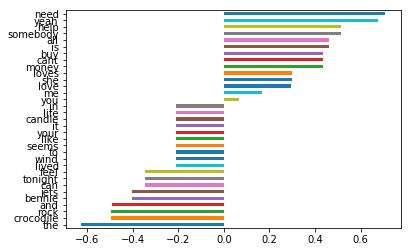

In [51]:
s.plot.barh()

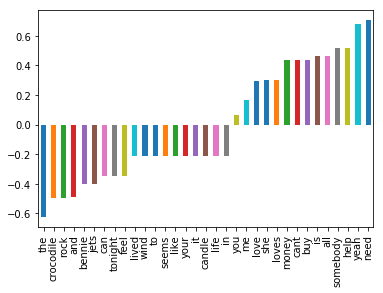

In [52]:
s.plot.bar()

In [46]:
plt.show()